In [1]:
from glob import glob
from xorca.lib import load_xorca_dataset
import xgcm
from matplotlib import pyplot as plt
import numpy as np
import xarray as xr
from cmocean import cm

import warnings
warnings.simplefilter('ignore')
%config InlineBackend.print_figure_kwargs = {'bbox_inches': None}

In [7]:
teste = xr.open_mfdataset("/scratch/usr/shkifmmp/postproc_ORION10/velocities/yearly/mops/polynya/ORION10.L46.LIM2vp.CFCSF6.MOPS.JRA.XIOS2.5_1y_DIC_Ross_1958_1968.nc")

In [11]:
teste.nav_lon.values[1]

array([ 169.75,  170.25,  170.75,  171.25,  171.75,  172.25,  172.75,
        173.25,  173.75,  174.25,  174.75,  175.25,  175.75,  176.25,
        176.75,  177.25,  177.75,  178.25,  178.75,  179.25,  179.75,
       -179.75, -179.25, -178.75, -178.25, -177.75, -177.25, -176.75,
       -176.25, -175.75, -175.25, -174.75, -174.25, -173.75, -173.25,
       -172.75, -172.25, -171.75, -171.25, -170.75, -170.25, -169.75,
       -169.25, -168.75, -168.25, -167.75, -167.25, -166.75, -166.25,
       -165.75, -165.25, -164.75, -164.25, -163.75, -163.25, -162.75,
       -162.25, -161.75, -161.25, -160.75, -160.25, -159.75, -159.25,
       -158.75, -158.25, -157.75, -157.25, -156.75, -156.25, -155.75,
       -155.25, -154.75, -154.25, -153.75, -153.25, -152.75, -152.25,
       -151.75, -151.25, -150.75], dtype=float32)

### Define path to data

In [2]:
path_10_hind = "/scratch/usr/shkifmmp/postproc_ORION10/velocities/yearly/mops/" # EXP 03 
mask_path_10 = '/scratch/usr/shklvn09/NUDATA/ORION/10-data/meshmask/'

In [3]:
meshmask_base_10 = [mask_path_10 + 'mesh_mask.nc']

In [4]:
output_10_hind = sorted(glob(path_10_hind + '*.nc'))

In [5]:
mops_vars = {'O2': {'dims': ['t', 'z_c', 'y_c', 'x_c']}, #no z_c because the 1st layer was previously selected 
                    'PO4': {'dims': ['t', 'z_c', 'y_c', 'x_c']},
                    'NO3': {'dims': ['t', 'z_c', 'y_c', 'x_c']},
                    'DIC': {'dims': ['t',  'z_c', 'y_c', 'x_c']},
                    'co2flux': {'dims': ['t', 'y_c', 'x_c']},
                    'co2flux_pre': {'dims': ['t', 'y_c', 'x_c']},
                    'sozotaux': {'dims': ['t', 'y_c', 'x_c']},
                    'sosstsst': {'dims': ['t', 'y_c', 'x_c']},
                    'sosaline': {'dims': ['t', 'y_c', 'x_c']},
                    'somxl010': {'dims': ['t', 'y_c', 'x_c']},
                    'votemper': {'dims': ['t', 'z_c', 'y_c', 'x_c']},
                    'vosaline': {'dims': ['t', 'z_c', 'y_c', 'x_c']}}

### Loading data

In [6]:
 = load_xorca_dataset(data_files=output_10_hind, aux_files=meshmask_base_10, model_config='GLOBAL',
                               update_orca_variables = mops_vars,
                               input_ds_chunks={"time_counter": 61, "t": 61, "z": 1, "deptht": 46, "depthu": 1, "depthv": 1, "depthw": 1},
                               target_ds_chunks = {"t": 61, "z_c": 46, "z_l": 1})

In [17]:
data_10_hind

<xarray.Dataset>
Dimensions:      (t: 123, x_c: 720, x_r: 720, y_c: 509, y_r: 509, z_c: 46, z_l: 46)
Coordinates:
  * t            (t) datetime64[ns] 1958-07-01T17:00:00 ... 2018-09-16
  * z_c          (z_c) int64 1 2 3 4 5 6 7 8 9 10 ... 38 39 40 41 42 43 44 45 46
  * z_l          (z_l) float64 0.5 1.5 2.5 3.5 4.5 ... 41.5 42.5 43.5 44.5 45.5
  * y_c          (y_c) int64 1 2 3 4 5 6 7 8 ... 502 503 504 505 506 507 508 509
  * y_r          (y_r) float64 1.5 2.5 3.5 4.5 5.5 ... 506.5 507.5 508.5 509.5
  * x_c          (x_c) int64 1 2 3 4 5 6 7 8 ... 713 714 715 716 717 718 719 720
  * x_r          (x_r) float64 1.5 2.5 3.5 4.5 5.5 ... 717.5 718.5 719.5 720.5
    depth_c      (z_c) float64 dask.array<chunksize=(46,), meta=np.ndarray>
    depth_l      (z_l) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    llat_cc      (y_c, x_c) float32 dask.array<chunksize=(509, 720), meta=np.ndarray>
    llat_cr      (y_c, x_r) float32 dask.array<chunksize=(509, 720), meta=np.ndarray>
    llat_rc      (y_r, x_c) float32 dask.array<chunksize=(509, 720), meta=np.ndarray>
    llat_rr      (y_r, x_r) float32 dask.array<chunksize=(509, 720), meta=np.ndarray>
    llon_cc      (y_c, x_c) float32 dask.array<chunksize=(509, 720), meta=np.ndarray>
    llon_cr      (y_c, x_r) float32 dask.array<chunksize=(509, 720), meta=np.ndarray>
    llon_rc      (y_r, x_c) float32 dask.array<chunksize=(509, 720), meta=np.ndarray>
    llon_rr      (y_r, x_r) float32 dask.array<chunksize=(509, 720), meta=np.ndarray>
    e1t          (y_c, x_c) float64 dask.array<chunksize=(509, 720), meta=np.ndarray>
    e2t          (y_c, x_c) float64 dask.array<chunksize=(509, 720), meta=np.ndarray>
    e3t          (z_c, y_c, x_c) float64 dask.array<chunksize=(46, 509, 720), meta=np.ndarray>
    e1u          (y_c, x_r) float64 dask.array<chunksize=(509, 720), meta=np.ndarray>
    e2u          (y_c, x_r) float64 dask.array<chunksize=(509, 720), meta=np.ndarray>
    e3u          (z_c, y_c, x_r) float64 dask.array<chunksize=(46, 509, 720), meta=np.ndarray>
    e1v          (y_r, x_c) float64 dask.array<chunksize=(509, 720), meta=np.ndarray>
    e2v          (y_r, x_c) float64 dask.array<chunksize=(509, 720), meta=np.ndarray>
    e3v          (z_c, y_r, x_c) float64 dask.array<chunksize=(46, 509, 720), meta=np.ndarray>
    e1f          (y_r, x_r) float64 dask.array<chunksize=(509, 720), meta=np.ndarray>
    e2f          (y_r, x_r) float64 dask.array<chunksize=(509, 720), meta=np.ndarray>
    e3w          (z_l, y_c, x_c) float64 dask.array<chunksize=(1, 509, 720), meta=np.ndarray>
    tmask        (z_c, y_c, x_c) int8 dask.array<chunksize=(46, 509, 720), meta=np.ndarray>
    umask        (z_c, y_c, x_r) int8 dask.array<chunksize=(46, 509, 720), meta=np.ndarray>
    vmask        (z_c, y_r, x_c) int8 dask.array<chunksize=(46, 509, 720), meta=np.ndarray>
    fmask        (z_c, y_r, x_r) int8 dask.array<chunksize=(46, 509, 720), meta=np.ndarray>
Data variables:
    DIC          (t, z_c, y_c, x_c) float32 dask.array<chunksize=(61, 46, 509, 720), meta=np.ndarray>
    NO3          (t, z_c, y_c, x_c) float32 dask.array<chunksize=(61, 46, 509, 720), meta=np.ndarray>
    O2           (t, z_c, y_c, x_c) float32 dask.array<chunksize=(61, 46, 509, 720), meta=np.ndarray>
    PO4          (t, z_c, y_c, x_c) float32 dask.array<chunksize=(61, 46, 509, 720), meta=np.ndarray>
    co2flux      (t, y_c, x_c) float32 dask.array<chunksize=(61, 509, 720), meta=np.ndarray>
    co2flux_pre  (t, y_c, x_c) float32 dask.array<chunksize=(61, 509, 720), meta=np.ndarray>
    somxl010     (t, y_c, x_c) float32 dask.array<chunksize=(61, 509, 720), meta=np.ndarray>
    sosaline     (t, y_c, x_c) float32 dask.array<chunksize=(61, 509, 720), meta=np.ndarray>
    sosstsst     (t, y_c, x_c) float32 dask.array<chunksize=(61, 509, 720), meta=np.ndarray>
    sozotaux     (t, y_c, x_c) float32 dask.array<chunksize=(61, 509, 720), meta=np.ndarray>
    vosaline     (t, z_c, y_c, x_c) float32 dask.array<chunksize=(61, 46, 509,

### Definying metrics for xgcm

In [8]:
at_10, au_10 = data_10_hind['e1t'] * data_10_hind['e2t'], data_10_hind['e1u'] * data_10_hind['e2u']
av_10, af_10 = data_10_hind['e1v'] * data_10_hind['e2v'], data_10_hind['e1f'] * data_10_hind['e2f']

data_10_hind = data_10_hind.update({'at': at_10, 'au': au_10, 'av': av_10, 'af': af_10})
data_10_hind = data_10_hind.set_coords(['at', 'au', 'av', 'af'])

metrics = {('X',): ['e1t', 'e1u', 'e1v', 'e1f'], # X distances
           ('Y',): ['e2t', 'e2u', 'e2v', 'e2f'], # Y distances
           ('Z',): ['e3t', 'e3u', 'e3v', 'e3w'], # Z distances
           ('X', 'Y'): ['at', 'au', 'av', 'af']} # Areas

In [9]:
grid = xgcm.Grid(data_10_hind, metrics=metrics)

### Finding Polynya region

In [49]:
data_10_hind['llon_cc'].isel(x_c=slice(0,500),y_c=slice(150,509)).values

array([[  73.25    ,   73.75    ,   74.25    , ...,  -38.25    ,
         -37.75    ,  -37.25    ],
       [  73.25    ,   73.75    ,   74.25    , ...,  -38.25    ,
         -37.75    ,  -37.25    ],
       [  73.25    ,   73.75    ,   74.25    , ...,  -38.25    ,
         -37.75    ,  -37.25    ],
       ...,
       [  73.01442 ,   73.05451 ,   73.08415 , ..., -103.172134,
        -103.03889 , -102.897095],
       [  73.00464 ,   73.03129 ,   73.04945 , ..., -104.71232 ,
        -104.63247 , -104.547485],
       [  73.000015,   73.00986 ,   73.01609 , ..., -106.24093 ,
        -106.214386, -106.186134]], dtype=float32)

In [47]:
infeliz.values

array([], shape=(359, 0), dtype=float32)

In [ ]:
data_10_hind['DIC'].isel(z_c=9, y_c=slice(0,200)).mean('t').plot(vmin=2000, vmax=2300)

In [44]:
#temp = data_nest_5d['votemper'].isel(t=73,z_c=9,x_c=slice(2200,3500),y_c=slice(150,550))
#sal = data_nest_5d['vosaline'].isel(t=73,z_c=9,x_c=slice(2200,3500),y_c=slice(150,550))
#dic = data_nest_5d['DIC'].isel(t=73,z_c=9,x_c=slice(2200,3500),y_c=slice(150,550))
#oxy = data_nest_5d['O2'].isel(t=73,z_c=9,x_c=slice(2200,3500),y_c=slice(150,550))
#cfc = data_nest_5d['CFC12'].isel(t=73,z_c=9,x_c=slice(2200,3500),y_c=slice(150,550))
lon = data_10_hind['llon_cc'].isel(x_c=slice(0,500),y_c=slice(150,509))
lat = data_10_hind['llat_cc'].isel(x_c=slice(0,500),y_c=slice(150,509))

In [46]:
lat.values

array([[-43.930252, -43.930252, -43.930252, ..., -43.930252, -43.930252,
        -43.930252],
       [-43.569073, -43.569073, -43.569073, ..., -43.569073, -43.569073,
        -43.569073],
       [-43.20571 , -43.20571 , -43.20571 , ..., -43.20571 , -43.20571 ,
        -43.20571 ],
       ...,
       [ 49.98324 ,  50.062233,  50.178898, ...,  83.11981 ,  83.32577 ,
         83.53215 ],
       [ 49.988163,  50.064743,  50.18131 , ...,  83.13089 ,  83.33721 ,
         83.54398 ],
       [ 49.995502,  50.065956,  50.182484, ...,  83.13636 ,  83.342865,
         83.54983 ]], dtype=float32)

In [26]:
DIC_per1= data_10_hind['DIC'].isel(t=slice(0,21)).mean('t') #1958 - 1968 mean

In [18]:
print(data_10_hind['llat_cc'][50])

<xarray.DataArray 'llat_cc' (x_c: 720)>
dask.array<getitem, shape=(720,), dtype=float32, chunksize=(720,), chunktype=numpy.ndarray>
Coordinates:
    y_c      int64 51
  * x_c      (x_c) int64 1 2 3 4 5 6 7 8 9 ... 713 714 715 716 717 718 719 720
    llat_cc  (x_c) float32 dask.array<chunksize=(720,), meta=np.ndarray>
    llon_cc  (x_c) float32 dask.array<chunksize=(720,), meta=np.ndarray>
    e1t      (x_c) float64 dask.array<chunksize=(720,), meta=np.ndarray>
    e2t      (x_c) float64 dask.array<chunksize=(720,), meta=np.ndarray>
    at       (x_c) float64 dask.array<chunksize=(720,), meta=np.ndarray>


TypeError: Shapes of x (389, 720) and z (389, 500) do not match

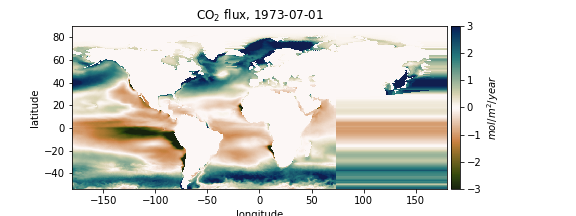

In [32]:
plt.figure(figsize=(8,3));
for tt in np.arange(30, 31):#len(data_nest['t'])):
    co2flux = (data_10_hind['co2flux'].isel(t=tt,x_c=slice(0,721), y_c=slice(120,509)))
    printdate = str(data_10_hind['t'].isel(t=tt).values)[0:10]
    plt.clf();
    plt.pcolormesh(data_10_hind['llon_cc'].isel(x_c=slice(0,721),y_c=slice(120,509)),
                   data_10_hind['llat_cc'].isel(x_c=slice(0,721),y_c=slice(120,509)), 
                   co2flux, cmap=cm.tarn, vmin=-3, vmax=3);
    plt.xlabel('longitude');
    plt.ylabel('latitude');
    plt.title('CO$_2$ flux, ' + printdate)
    c = plt.colorbar(pad=0.01);
    c.ax.set_ylabel('$mol/m^2/year$')
    plt.contourf(data_10_hind['llon_cc'].isel(x_c=slice(0,721),y_c=slice(120,509)),
                 data_10_hind['llat_cc'].isel(x_c=slice(0,721),y_c=slice(120,509)),
                 data_10_hind['tmask'].isel(z_c=0, x_c=slice(0,500),
                 y_c=slice(120,509)).where(data_10_hind['tmask'].isel(z_c=0, x_c=slice(0,721),
                 y_c=slice(120,509)) == 0.), vmin=0.5, vmax=1.5, colors='gainsboro')
    plt.tight_layout()

In [ ]:
data_10_hind['DIC'].isel(t=slice(0,21)).values

In [ ]:
grid.average(data_10_hind.DIC, ['X']).plot()

In [ ]:
data_10_hind['DIC'].isel(z_c=9, y_c=slice(0,200)).mean('t').plot(vmin=2000, vmax=2300)

In [ ]:
grid.average(ds.UVEL, ['X','Y']).plot(y='Z');

In [11]:
lon = data_10_hind['llon_cc'].isel(x_c=slice(200,300),y_c=slice(150,500))
lat = data_10_hind['llat_cc'].isel(x_c=slice(200,300),y_c=slice(150,500))

In [15]:
lon.values[0]

array([ 173.25,  173.75,  174.25,  174.75,  175.25,  175.75,  176.25,
        176.75,  177.25,  177.75,  178.25,  178.75,  179.25,  179.75,
       -179.75, -179.25, -178.75, -178.25, -177.75, -177.25, -176.75,
       -176.25, -175.75, -175.25, -174.75, -174.25, -173.75, -173.25,
       -172.75, -172.25, -171.75, -171.25, -170.75, -170.25, -169.75,
       -169.25, -168.75, -168.25, -167.75, -167.25, -166.75, -166.25,
       -165.75, -165.25, -164.75, -164.25, -163.75, -163.25, -162.75,
       -162.25, -161.75, -161.25, -160.75, -160.25, -159.75, -159.25,
       -158.75, -158.25, -157.75, -157.25, -156.75, -156.25, -155.75,
       -155.25, -154.75, -154.25, -153.75, -153.25, -152.75, -152.25,
       -151.75, -151.25, -150.75, -150.25, -149.75, -149.25, -148.75,
       -148.25, -147.75, -147.25, -146.75, -146.25, -145.75, -145.25,
       -144.75, -144.25, -143.75, -143.25, -142.75, -142.25, -141.75,
       -141.25, -140.75, -140.25, -139.75, -139.25, -138.75, -138.25,
       -137.75, -137